# 개념
- 결측치, 이상치, 중복치
- isnull()
- notnull()
- isnull.sum()
- dropna()
- dropna(axis = 0)
- dropna(axis = 1)
- 0 행, 1열

-------------------------------------
결측치 처리 방법
1. 결측치 확인 / 2. 결측치 대체 및 제거 / 3. 결측치 반영 확인
- 결측치 대체 : 숫자 데이터는 주로 평균, 문자열 데이터는 빈도 및 비율에 따라 대체

-------------------------------------
dtype / axis 등 괄호가 없는 것 = 속성
isaull() / dropna() 등 괄호가 있는 것 = 함수 = True/False 를 반환

-------------------------------------
- fillna()
- mean()

-------------------------------------
-------------------------------------
이상 데이터
- 정상에서 벗어난 데이터를 이상치
- 이상한(비정상적인) 데이터를 검출하는 것을 이상탐지
- 상자그림(박스플롯)으로 확인 가능

이상치 처리 방법
- 1. 이상데이터 확인 / 2. 이상데이터 결측 대체 및 제거 / 3. 이상 데이터 반영 확인
- 이상데이터 확인 : 그래프(박스플롯, 산점도 등)
- 박스플롯
    - 중앙선 = 중앙값
    - 박스 위 = 3분위수 = 75% = Q3
    - 박스 아래 = 1분위수 = 25%  = Q1
    - 위 모자표시 = 최대값 = Q3+1.5*IQR = 수염(whisker)
    - 아래 모자표시 = 최소값 = Q1-1.5*IQR = 수염(whisker)
    - 데스크 라이브..?
    + R 에서 summary = 기초통계(기술통계)
    - IQR = 1분위수 ~ 3분위수 = 박스플롯 = Q3 - Q1
- 전체적인 흐름은 '결측치 처리 방법'과 유사
- 이상데이터 결측 대체 및 제거
    - 단순삭제 : (경험치(= 도메인 = 지식)를 바탕으로) 데이터 처리과정에서의 오류, 비현실적인 응답
    - 다른 값으로 대체 : 데이터의 개수가 작은 경우, 이상치를 제거하면 데이터의 절대량이 작아디는 문제가 발생하므로 다른 값으로 대체하거나 예측모델을 만들어 이상값을 예측한 후 해당 값으로 대체하는 방법을 사용
    - 변수화 : 이상값이 발생했을 때 바로 삭제하지 말고 더 이상값에 대해 파악하는 것이 중요! 다른 변수(컬럼)으로 변환을 통해 대체
    - 리샘플링
    - 케이스분리 분석
    + 데이터 대체 및 제거시 '회의록'과 같은 증거문서를 작성!

## 이상치 처리하기

### 사용할 데이터 불러오기

In [17]:
# 라이브러리 불러오기
# 데이터 처리를 위한 라이브러리
# 판다스 안에 데이터를 불러오는 기능이 있음
import pandas as pd

In [9]:
# 행의 위치를 찾기위해서 필요한 함수를 포함하는 라이브러리
import numpy as np

In [12]:
# bicycle_out.csv 불러오기
# 파일 경로 지정하기
file_path = "./data/bicycle_out.csv"

In [20]:
# 데이터 셋 불러오기
# euc-kr = 우리나라에서만 통용되는 언어 = 문자 타입이 한글
# 이 방법보다는 파일을 'utf-8'로 변환해서 저장해는 것이 좋음
df = pd.read_csv(file_path, encoding = 'euc-kr')

In [31]:
df
# 범주형 데이터 = 구분할 수 있는 값 = 연속형 데이터를 제외한 데이터
# 대여소번호, 대여거치대, 반납대여소번호, 반납거치대, 
# 이용시간(시간대별로 나누기, 오전/오후/저녁), 이용거리, 나이(나이대)

# 연속형 데이터 = 시/분/초 가 있는 값
# 대여일시,반납일시

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [45]:
# df_drop_allrow 변수명으로
# 결측치 행 삭제.
# 후 변수에 저장하기
df_drop_allrow = df.dropna(axis = 0)
df_drop_allrow

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [185]:
# loc, iloc
# 인덱스 번호 재배열
# 언제하는가? : 데이터 제거가 수행된 후에 (행에 대해서!)
# df_drop_allrow.reset_index()
# 결과 : 컬럼으로 index가 추가되어 출력 = 제거되고 그대로 남아 있던 인덱스 번호가 그대로 index 컬럼으로 들어가서 출력
# df_drop_allrow = df_drop_allrow.reset_index(drop = True)

# df_drop_allrow
# drop = True : 기존(재배열하기 전)의 인덱스 번호는 컬럼으로 사용하지 않을 것을 의미
# df_drop_allrow.reset_index(drop = False)
# drop = False : 디폴트

df_drop_allrow = df_drop_allrow.reset_index(drop=True)

df_drop_allrow


,level_0,index,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,0,0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,1,1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,2,4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
3,3,5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,4,6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,353,414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,354,415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,355,417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,356,418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [187]:
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [189]:
df_drop_allrow = df.dropna(axis = 0)
df_drop_allrow

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [190]:
df_drop_allrow = df_drop_allrow.reset_index(drop=True)

df_drop_allrow


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [42]:
# 이상치 확인
# 일반적으로 그림으로 확인

# 그림 그리는 라이브러리 불러들이기
import matplotlib as mpl
import matplotlib.pylab as pit

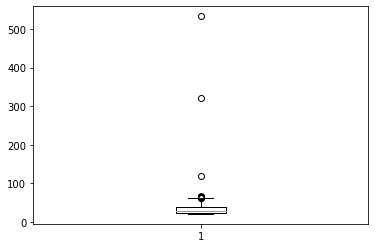

count    358.000000
mean      35.159218
std       32.747653
min       21.000000
25%       24.000000
50%       29.000000
75%       39.000000
max      533.000000
Name: 나이, dtype: float64

In [52]:
# 박스플롯 그리기
# 문자열이 포함되면 오류가 남
plt.boxplot(df_drop_allrow['나이'])
plt.show()

# '나이' 데이터에 대한 '기초통계' 조회
# describe() : 기초통계
# 이상치를 찾기 위해 박스플롯의 최대값과 최소값을 구해야한다.
df_drop_allrow['나이'].describe()

In [61]:
# 전체 데이터프레임에서 나이가 100살을 초과하는 데이터 조회하기
df_drop_allrow[(df_drop_allrow['나이'] > 100)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


In [62]:
# 전체 데이터프레임에서 나이가 10살 이하인 데이터를 조회
df_drop_allrow[(df_drop_allrow['나이'] <= 10)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이


In [67]:
# 위의 조건을 모두 합쳐서
# 100살을 초과하거나(또는 / | / or) 10살 이하인 데이터만 조회
# 비교연산자에 논리연산자 추가
df_drop_allrow[(df_drop_allrow['나이'] > 100) |
               (df_drop_allrow['나이'] <= 10)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


In [69]:
df_drop_allrow

# 358 rows × 12 columns

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


### 최대값/최소값 계산하여 이상치 제거하기

In [70]:
# numpy 라이브러리 불러들이기
import numpy as np

In [77]:
# Q1과 Q3 값 확인하기
# percentile() : 25%와 75% 시점의 데이터 값을 알려준다.(retrun)
q1, q3 = np.percentile(df_drop_allrow['나이'], [25, 75])
print(q1)
print(q3)

24.0
39.0


In [81]:
# IQR 값 계산하기
iqr = q3 - q1

iqr

15.0

In [82]:
# 최대값 / 최소값 계산하기
# 최대값 = q3 + (iqr*1.5)
# 최소값 = q1 - (iqr*1.5)

In [84]:
# 최대값 계산하기
upper_bound = q3 + (iqr*1.5)

upper_bound

61.5

In [89]:
# 최소값 계산하기
lower_bound = q1 - (iqr*1.5)

lower_bound

1.5

# 이상치 데이터 찾아보기

In [90]:
# 나이 데이터에서 이상치 데이터 조회하기
df_drop_allrow[(df_drop_allrow['나이'] < lower_bound) |
               (df_drop_allrow['나이']  > upper_bound)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
263,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
294,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
361,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
362,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [92]:
# 데이터 개수 확인하기
# len()
len(df_drop_allrow[(df_drop_allrow['나이'] < lower_bound) |
               (df_drop_allrow['나이']  > upper_bound)])

10

### 함수로 만들어 보기

In [93]:
def (q1, q3 = np.percentile(df_drop_allrow['나이'], [25, 75]),
    upper_bound = q3 + (iqr*1.5),
    lower_bound = q1 - (iqr*1.5),
    df_drop_allrow[(df_drop_allrow['나이'] < lower_bound) |
               (df_drop_allrow['나이']  > upper_bound)])

SyntaxError: invalid syntax (Temp/ipykernel_7336/955652296.py, line 1)

In [116]:
def ma(a):
    q1, q3 = np.percentile(df_drop_allrow[a], [25, 75])
    
    return print(q1, q3)

In [117]:
ma('나이')

24.0 39.0


In [118]:
def ma(a):
    q1, q3 = np.percentile(df_drop_allrow[a], [25, 75]),
    iqr = q1 - q3
    
    return print(q1, q3, iqr)

In [119]:
ma('나이')

ValueError: not enough values to unpack (expected 2, got 1)

In [133]:
# 매개변수가 없는 함수
# 반복해서 사용되거나, 자주 사용되는 것을 함수로 만듦
# 그렇기에 함수는 범용으로 사용할 수 있도록 만들어 주는 것이 좋음
# 함수는 기능을 수행하는 것이 가장 큰 목적이다.
# 함수 funstion --> def
# 함수 = 기다리는 중
def outliers_iqr() :
    # Q1과 Q3 값 확인하기
    # percentile() : 25%와 75% 시점의 데이터 값을 알려준다.(retrun)
    q1, q3 = np.percentile(df_drop_allrow['나이'], [25, 75])
    print(q1)
    print(q3)
    
    # IQR 값 계산하기
    iqr = q3 - q1

    print(iqr)
    
    # 최대값 계산하기
    upper_bound = q3 + (iqr*1.5)
    print(upper_bound)
    
    # 최소값 계산하기
    lower_bound = q1 - (iqr*1.5)
    print(lower_bound)
    
    # 나이 데이터에서 이상치 데이터 조회하기
    df_temp = df_drop_allrow[(df_drop_allrow['나이'] < lower_bound) |
                   (df_drop_allrow['나이']  > upper_bound)]
      
    print(len(df_temp))
    print(df_temp)

In [146]:
# 함수 실행
outliers_iqr()

24.0
39.0
15.0
61.5
1.5
10
         자전거번호              대여일시  대여소번호          대여소명  대여거치대  \
4    SPB-07935  2019-11-05 12:29    512   뚝섬역 1번 출구 옆   11.0   
30   SPB-20840   2019-11-28 8:32    419        홈플러스 앞    1.0   
47   SPB-11637  2019-11-01 15:35    103    망원역 2번출구 앞    4.0   
148  SPB-24758  2019-11-04 17:59    106    합정역 7번출구 앞    7.0   
221  SPB-06127  2019-11-06 16:06   1925  동양미래대학교 정문 옆    6.0   
263  SPB-15960   2019-11-08 9:10    103    망원역 2번출구 앞    1.0   
294  SPB-08818  2019-11-08 23:13    108       서교동 사거리    2.0   
361  SPB-24781   2019-11-12 9:47    104    합정역 1번출구 앞   10.0   
362  SPB-24781  2019-11-12 10:45    101   (구)합정동 주민센터    3.0   
363  SPB-24858  2019-11-12 11:41    113  홍대입구역 2번출구 앞   21.0   

                 반납일시  반납대여소번호       반납대여소명  반납거치대  이용시간     이용거리   나이  
4    2019-11-05 12:39        3         중랑센터    7.0  10.0   1650.0  120  
30    2019-11-28 8:35        5     상암센터 정비실    5.0   3.0    280.0  533  
47   2019-11-01 15:41      101  (구)합정동 주민센터    2.

In [147]:
# 매개변수가 있는 함수
# 데이터를 넘겨주는 데로 알아서 이상치 값을 출력하는 기능을 가진 함수
def outliers_iqr2(data) :
    # Q1과 Q3 값 확인하기
    # percentile() : 25%와 75% 시점의 데이터 값을 알려준다.(retrun)
    q1, q3 = np.percentile(data, [25, 75])
    print(q1)
    print(q3)
    
    # IQR 값 계산하기
    iqr = q3 - q1

    print(iqr)
    
    # 최대값 계산하기
    upper_bound = q3 + (iqr*1.5)
    print(upper_bound)
    
    # 최소값 계산하기
    lower_bound = q1 - (iqr*1.5)
    print(lower_bound)
    
    # 나이 데이터에서 이상치 데이터 조회하기
    df_temp = df_drop_allrow[(data < lower_bound) |
                   (data  > upper_bound)]
      
    print(len(df_temp))
    print(df_temp)

In [149]:
outliers_iqr2(df_drop_allrow['나이'])

24.0
39.0
15.0
61.5
1.5
10
         자전거번호              대여일시  대여소번호          대여소명  대여거치대  \
4    SPB-07935  2019-11-05 12:29    512   뚝섬역 1번 출구 옆   11.0   
30   SPB-20840   2019-11-28 8:32    419        홈플러스 앞    1.0   
47   SPB-11637  2019-11-01 15:35    103    망원역 2번출구 앞    4.0   
148  SPB-24758  2019-11-04 17:59    106    합정역 7번출구 앞    7.0   
221  SPB-06127  2019-11-06 16:06   1925  동양미래대학교 정문 옆    6.0   
263  SPB-15960   2019-11-08 9:10    103    망원역 2번출구 앞    1.0   
294  SPB-08818  2019-11-08 23:13    108       서교동 사거리    2.0   
361  SPB-24781   2019-11-12 9:47    104    합정역 1번출구 앞   10.0   
362  SPB-24781  2019-11-12 10:45    101   (구)합정동 주민센터    3.0   
363  SPB-24858  2019-11-12 11:41    113  홍대입구역 2번출구 앞   21.0   

                 반납일시  반납대여소번호       반납대여소명  반납거치대  이용시간     이용거리   나이  
4    2019-11-05 12:39        3         중랑센터    7.0  10.0   1650.0  120  
30    2019-11-28 8:35        5     상암센터 정비실    5.0   3.0    280.0  533  
47   2019-11-01 15:41      101  (구)합정동 주민센터    2.

In [150]:
# 매개변수가 있는 함수
# 데이터를 넘겨주는 데로 알아서 이상치 값을 출력하는 기능을 가진 함수
def outliers_iqr3(dframe, data) :
    # Q1과 Q3 값 확인하기
    # percentile() : 25%와 75% 시점의 데이터 값을 알려준다.(retrun)
    q1, q3 = np.percentile(data, [25, 75])
    print(q1)
    print(q3)
    
    # IQR 값 계산하기
    iqr = q3 - q1

    print(iqr)
    
    # 최대값 계산하기
    upper_bound = q3 + (iqr*1.5)
    print(upper_bound)
    
    # 최소값 계산하기
    lower_bound = q1 - (iqr*1.5)
    print(lower_bound)
    
    # 나이 데이터에서 이상치 데이터 조회하기
    df_temp = dframe[(data < lower_bound) |
                   (data  > upper_bound)]
      
    print(len(df_temp))
    print(df_temp)

In [151]:
# 함수 호출하기
outliers_iqr3(df_drop_allrow, df_drop_allrow['나이'])

24.0
39.0
15.0
61.5
1.5
10
         자전거번호              대여일시  대여소번호          대여소명  대여거치대  \
4    SPB-07935  2019-11-05 12:29    512   뚝섬역 1번 출구 옆   11.0   
30   SPB-20840   2019-11-28 8:32    419        홈플러스 앞    1.0   
47   SPB-11637  2019-11-01 15:35    103    망원역 2번출구 앞    4.0   
148  SPB-24758  2019-11-04 17:59    106    합정역 7번출구 앞    7.0   
221  SPB-06127  2019-11-06 16:06   1925  동양미래대학교 정문 옆    6.0   
263  SPB-15960   2019-11-08 9:10    103    망원역 2번출구 앞    1.0   
294  SPB-08818  2019-11-08 23:13    108       서교동 사거리    2.0   
361  SPB-24781   2019-11-12 9:47    104    합정역 1번출구 앞   10.0   
362  SPB-24781  2019-11-12 10:45    101   (구)합정동 주민센터    3.0   
363  SPB-24858  2019-11-12 11:41    113  홍대입구역 2번출구 앞   21.0   

                 반납일시  반납대여소번호       반납대여소명  반납거치대  이용시간     이용거리   나이  
4    2019-11-05 12:39        3         중랑센터    7.0  10.0   1650.0  120  
30    2019-11-28 8:35        5     상암센터 정비실    5.0   3.0    280.0  533  
47   2019-11-01 15:41      101  (구)합정동 주민센터    2.

In [164]:
# 모듈 = 함수의 집합 = 클래스의 집합
# outliers 불러들이기
import outliers

In [169]:
# 지금은 실행은 안되지만, 다음에는 될 듯
# 아나콘다 영역에서 벗어나서 오류가 생기는 듯
# 로컬에 파이썬이 설치가 안되어 있어서 그런듯
outliers.outliers_iqr3(df_drop_allrow, df_drop_allrow['나이'])

NameError: name 'np' is not defined

In [173]:
df_drop_allrow[(df_drop_allrow['나이'] < 1.5) |
                   (df_drop_allrow['나이']  > 61.5)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
263,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
294,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
361,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
362,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [191]:
((df_drop_allrow['나이'] < 1.5) | (df_drop_allrow['나이']  > 61.5))

0      False
1      False
2       True
3      False
4      False
       ...  
353    False
354    False
355    False
356    False
357    False
Name: 나이, Length: 358, dtype: bool

In [192]:
# 행 번호만 조회
np.where((df_drop_allrow['나이'] < 1.5) | (df_drop_allrow['나이']  > 61.5))

(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [197]:
# 이상치가 있는 index 번호만 조회하기
def get_outliers_data(data) :
    # Q1과 Q3 값 확인하기
    # percentile() : 25%와 75% 시점의 데이터 값을 알려준다.(retrun)
    q1, q3 = np.percentile(data, [25, 75])
    print(q1)
    print(q3)
    
    # IQR 값 계산하기
    iqr = q3 - q1

    print(iqr)
    
    # 최대값 계산하기
    upper_bound = q3 + (iqr*1.5)
    print(upper_bound)
    
    # 최소값 계산하기
    lower_bound = q1 - (iqr*1.5)
    print(lower_bound)
    
    # 나이 데이터에서 이상치 데이터 조회하기
    #df_temp = dframe[(data < lower_bound) |
    #               (data  > upper_bound)]
      
    # print(len(df_temp))
    # print(df_temp)
    
    return np.where((data < lower_bound) | (data  > upper_bound))

In [198]:
get_outliers_data(df_drop_allrow['나이'])

24.0
39.0
15.0
61.5
1.5


(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [201]:
# 전체 데이터프레임에서 행번호로 찾기
# loc()
df_drop_allrow.loc[get_outliers_data(df_drop_allrow['나이'])]

24.0
39.0
15.0
61.5
1.5


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [203]:
# 함수 값 변수로 받아오기
age_outlier_index = get_outliers_data(df_drop_allrow['나이'])

24.0
39.0
15.0
61.5
1.5


In [211]:
age_outlier_index

(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [207]:
df_drop_allrow.loc[age_outlier_index]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [208]:
age_outlier_index.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [209]:
df_drop_allrow.index

RangeIndex(start=0, stop=358, step=1)

### 이상치 제거하기

In [219]:
# 이상치가 아닌 값만 추출 = 이상치 제거
# 아닌 값 따로 저장하기

age_non_outlier_index = []

# 이상치 인덱스가 아닌 정상 인덱스만 추출하기
for idx in df_drop_allrow.index :
    
    if idx not in age_outlier_index[0] :
        age_non_outlier_index.append(idx)
        
print(age_non_outlier_index)

len(age_non_outlier_index)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 

348

In [212]:
age_outlier_index

(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [218]:
age_outlier_index[0]

array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64)

In [225]:
# 전체 데이터프레임에서 정상데이터만 조회
# 이상치가 아닌 정상 데이터만 있음
df_new = df_drop_allrow.loc[age_non_outlier_index]

df_new

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
5,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [231]:
# 인덱스 번호 재배열 후에 최종 결과물을 변수에 저장하고 조회
df_new = df_new.reset_index(drop = True)

In [234]:
df_new.head(20)

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
3,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
4,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
5,SPB-20220,2019-11-11 8:35,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-11 8:42,3,중랑센터,2.0,6.0,1160.0,53
6,SPB-20102,2019-11-11 9:45,646,장한평역 1번출구 (국민은행앞),8.0,2019-11-11 10:17,3,중랑센터,7.0,30.0,1060.0,54
7,SPB-10000,2019-11-12 8:35,646,장한평역 1번출구 (국민은행앞),8.0,2019-11-12 8:44,3,중랑센터,2.0,8.0,1300.0,30
8,SPB-21851,2019-11-14 9:33,646,장한평역 1번출구 (국민은행앞),10.0,2019-11-14 10:02,3,중랑센터,2.0,28.0,1220.0,51
9,SPB-13973,2019-11-15 8:42,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-15 8:50,3,중랑센터,2.0,6.0,1370.0,32
